# 기능개발

**문제 설명**

프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return 하도록 solution 함수를 완성하세요.

**제한 사항**

- 작업의 개수(progresses, speeds배열의 길이)는 100개 이하입니다.
- 작업 진도는 100 미만의 자연수입니다.
- 작업 속도는 100 이하의 자연수입니다.

배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.
입출력 예

|progresses|	speeds|	return|
|:---:|:--:|:---:|
|[93, 30, 55]|	[1, 30, 5]|	[2, 1]|
|[95, 90, 99, 99, 80, 99]|	[1, 1, 1, 1, 1, 1]|	[1, 3, 2]|

**입출력 예 설명**

입출력 예 #1

    첫 번째 기능은 93% 완료되어 있고 하루에 1%씩 작업이 가능하므로 7일간 작업 후 배포가 가능합니다.

    두 번째 기능은 30%가 완료되어 있고 하루에 30%씩 작업이 가능하므로 3일간 작업 후 배포가 가능합니다. 하지만 이전 첫 번째 기능이 아직 완성된 상태가 아니기 때문에 첫 번째 기능이 배포되는 7일째 배포됩니다.
    세 번째 기능은 55%가 완료되어 있고 하루에 5%씩 작업이 가능하므로 9일간 작업 후 배포가 가능합니다.

    따라서 7일째에 2개의 기능, 9일째에 1개의 기능이 배포됩니다.

입출력 예 #2

    모든 기능이 하루에 1%씩 작업이 가능하므로, 작업이 끝나기까지 남은 일수는 각각 5일, 10일, 1일, 1일, 20일, 1일입니다. 어떤 기능이 먼저 완성되었더라도 앞에 있는 모든 기능이 완성되지 않으면 배포가 불가능합니다.

    따라서 5일째에 1개의 기능, 10일째에 3개의 기능, 20일째에 2개의 기능이 배포됩니다.

- 선점 비선점문제
- 앞에 있는 요소가 너무 오래걸리는 작업인 경우 적게 걸리는 작업부터 스케줄링할 수 있다.
- 이 문제의 경우 선점 스케줄링문제이다.


In [35]:
# O(N^2)

def solution(progresses, speeds):
    answer = []
    stack = []
    
    for i in range(len(progresses)):
        curr = progresses[i] + speeds[i]
        day = 1
        while curr < 100:
            curr = curr + speeds[i]  
            day += 1
            
        if i == 0:
            # 첫번째 시행의 경우
            stack.append(day)
            continue
        
        if stack[0] < day:
            # stack을 비우고 day를 삽입한다.
            # 가장 오래걸리는 작업보다 더 오래걸리는 작업이 오면 스택을 비우고 오래걸리는 작업을 스택이 삽입한다.
            count = 0
            while stack:
                stack.pop()
                count += 1
            stack.append(day)
            answer.append(count)
        else:
            # 가장 오래걸리는 작업은 스택의 첫번째에 있고
            # 그보다 적게 걸리는 작업은 스택의 요소로 쌓이게된다.
            stack.append(day)

    return answer + [len(stack)]

In [36]:
progresses = [93,30,55]
speeds = [1,30,5]

In [37]:
solution(progresses, speeds)

[2, 1]

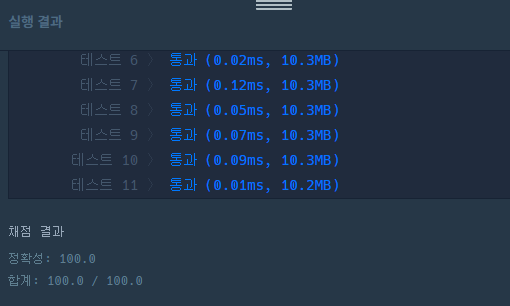

In [ ]:
# O(N) 풀이

import math

def solution(progresses, speeds):
    progresses = [math.ceil((100 - a) / b) for a, b in zip(progresses, speeds)]
    answer = []
    front = 0

    for idx in range(len(progresses)):
        if progresses[idx] > progresses[front]:  
            answer.append(idx - front)
            front = idx 
    answer.append(len(progresses) - front)

    return answer

In [ ]:
# O(N) 풀이

def solution(progresses, speeds):
    Q=[]
    for p, s in zip(progresses, speeds):
        if len(Q)==0 or Q[-1][0]<-((p-100)//s):
            Q.append([-((p-100)//s),1])
        else:
            Q[-1][1]+=1
    return [q[1] for q in Q]

1) 모든 풀이 과정을 다 리스트에 담아두는 방식으로 접근하지 x --> 원하는대로 구현이 안되기 쉽상. 

2) 입출력 순서에 대한 언급이 있다면, stack , queue 이라 간파하고 pop 으로 풀려고 해보기 

- stack 의 경우에는 별도의 리스트 만들고 (stack_list)
반복하며 stack_list.pop() 으로 접근하면 쉽게 풀림 ex) () {} 문제들. 

- queue 의 경우는 pop(0)